# Surprise Housing Advanced Linear Regression Assignment
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know:

Which variables are significant in predicting the price of a house, and

How well those variables describe the price of a house.

 

Also, determine the optimal value of lambda for ridge and lasso regression.

In [1]:
# importing all the important
import numpy as np
import pandas as pd
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
import statsmodels.api as sm
import os

from scipy import stats
from scipy.stats import skew, norm, probplot, boxcox

# hide warnings
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
# Reading the dataset to housing_df_main dataframe variable
housing_df_main = pd.read_csv("train.csv")

In [3]:
# Let us glance over the dataset
housing_df_main.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.000,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.000,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.000,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.000,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Data Understanding

In [4]:
# Let us see shape of our dataset
housing_df_main.shape

(1460, 81)

In [5]:
#Let us see the info now to understand the datatype of each column
housing_df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
# Most of the columns seems integer or object, let us do describe of them and see column wise values
housing_df_main.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,1460.000,730.500,421.610,1.000,365.750,730.500,1095.250,1460.000
MSSubClass,1460.000,56.897,42.301,20.000,20.000,50.000,70.000,190.000
LotFrontage,1201.000,70.050,24.285,21.000,59.000,69.000,80.000,313.000
LotArea,1460.000,10516.828,9981.265,1300.000,7553.500,9478.500,11601.500,215245.000
OverallQual,1460.000,6.099,1.383,1.000,5.000,6.000,7.000,10.000
OverallCond,1460.000,5.575,1.113,1.000,5.000,5.000,6.000,9.000
YearBuilt,1460.000,1971.268,30.203,1872.000,1954.000,1973.000,2000.000,2010.000
YearRemodAdd,1460.000,1984.866,20.645,1950.000,1967.000,1994.000,2004.000,2010.000
MasVnrArea,1452.000,103.685,181.066,0.000,0.000,0.000,166.000,1600.000
BsmtFinSF1,1460.000,443.640,456.098,0.000,0.000,383.500,712.250,5644.000


## Data Cleaning

### Null Value Handling

In [7]:
# Calculating the % of null values for the entire dataset
round(housing_df_main.isnull().sum()/len(housing_df_main.index),2).sort_values(ascending=False).head(20)

PoolQC         1.000
MiscFeature    0.960
Alley          0.940
Fence          0.810
FireplaceQu    0.470
LotFrontage    0.180
GarageYrBlt    0.060
GarageFinish   0.060
GarageType     0.060
GarageQual     0.060
GarageCond     0.060
BsmtExposure   0.030
BsmtQual       0.030
BsmtCond       0.030
BsmtFinType2   0.030
BsmtFinType1   0.030
MasVnrType     0.010
MasVnrArea     0.010
Id             0.000
Functional     0.000
dtype: float64

In [8]:
## dropping the column having more then 50% null values
round(housing_df_main.isnull().sum()/len(housing_df_main.index),2)[round(housing_df_main.isnull().sum()/
                                                                 len(housing_df_main.index),2).values>0.50]

Alley         0.940
PoolQC        1.000
Fence         0.810
MiscFeature   0.960
dtype: float64

In [9]:
# Let us drop these columns
housing_df_main = housing_df_main.drop(['Alley','PoolQC','Fence','MiscFeature'],axis='columns')

### Handling NA values

In [10]:
## Checking the columns where the missing values between 0-10%
round(housing_df_main.isnull().sum()/len(housing_df_main.index),2)[round(housing_df_main.isnull().sum()/
                                                                 len(housing_df_main.index),2).values>0.00]

LotFrontage    0.180
MasVnrType     0.010
MasVnrArea     0.010
BsmtQual       0.030
BsmtCond       0.030
BsmtExposure   0.030
BsmtFinType1   0.030
BsmtFinType2   0.030
FireplaceQu    0.470
GarageType     0.060
GarageYrBlt    0.060
GarageFinish   0.060
GarageQual     0.060
GarageCond     0.060
dtype: float64

In [11]:
# The NAN values in the categorical columns will be replaced by NA, 
# and in numerical columns by the median value of the column values
housing_df_main.LotFrontage.fillna(housing_df_main.LotFrontage.median(),inplace=True)
housing_df_main.MasVnrType.fillna('None',inplace=True)
housing_df_main.MasVnrArea.fillna(housing_df_main.MasVnrArea.median(),inplace=True)
housing_df_main.BsmtQual.fillna('NA',inplace=True)
housing_df_main.BsmtCond.fillna('NA',inplace=True)
housing_df_main.BsmtExposure.fillna('NA',inplace=True)
housing_df_main.BsmtFinType1.fillna('NA',inplace=True)
housing_df_main.BsmtFinType2.fillna('NA',inplace=True)
housing_df_main.GarageType.fillna('NA',inplace=True)
housing_df_main.GarageYrBlt.fillna(0,inplace=True)
housing_df_main.GarageFinish.fillna('NA',inplace=True)
housing_df_main.GarageQual.fillna('NA',inplace=True)
housing_df_main.FireplaceQu.fillna('NA',inplace=True)

In [12]:
## Removed the row where Electrical was null
housing_df_main=housing_df_main[~housing_df_main.Electrical.isna()]

In [13]:
housing_df_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   object 
 3   LotFrontage    1459 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1459 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

### Unwanted & Redundant Column Removal

In [14]:
columnsToDrop=['Id','RoofMatl','Condition2','Heating','Street','Utilities','GarageCond']
housing_df_main = housing_df_main.drop(columnsToDrop,axis='columns')

### Outlier Treatment

In [15]:
## Numerical columns in data set are :
numerical_cols=list(housing_df_main.dtypes[housing_df_main.dtypes!='object'].index)
## Categorical columns in data set are :
categorical_cols=list(housing_df_main.dtypes[housing_df_main.dtypes=='object'].index)

In [16]:
housing_df_main[numerical_cols].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1459.000,56.881,42.311,20.000,20.000,50.000,70.000,190.000
LotFrontage,1459.000,69.862,22.035,21.000,60.000,69.000,79.000,313.000
LotArea,1459.000,10517.364,9984.666,1300.000,7549.000,9477.000,11603.000,215245.000
OverallQual,1459.000,6.100,1.383,1.000,5.000,6.000,7.000,10.000
OverallCond,1459.000,5.576,1.113,1.000,5.000,5.000,6.000,9.000
YearBuilt,1459.000,1971.244,30.200,1872.000,1954.000,1973.000,2000.000,2010.000
YearRemodAdd,1459.000,1984.851,20.644,1950.000,1967.000,1994.000,2004.000,2010.000
MasVnrArea,1459.000,103.188,180.773,0.000,0.000,0.000,164.500,1600.000
BsmtFinSF1,1459.000,443.944,456.106,0.000,0.000,384.000,712.500,5644.000
BsmtFinSF2,1459.000,46.581,161.370,0.000,0.000,0.000,0.000,1474.000


#### We can observe there is a huge gap for few columns and they require outlier treatment for the same

In [17]:
# Defining the function to do outlier treatment
def drop_outliers(x):
    list = []
    for col in numerical_cols:
        Q1 = x[col].quantile(.25)
        Q3 = x[col].quantile(.99)
        IQR = Q3-Q1
        x =  x[(x[col] >= (Q1-(1.5*IQR))) & (x[col] <= (Q3+(1.5*IQR)))] 
    return x  

In [18]:
# We will now do the outlier treatment on the numerical cols we identified above
housing_df_main = drop_outliers(housing_df_main)

In [19]:
housing_df_main.shape

(1359, 70)

### Duplicate Treatment

In [20]:
# Dropping duplicate values in dataset, if exist
housing_df_main = housing_df_main.drop_duplicates()

In [21]:
housing_df_main.shape

(1359, 70)

In [22]:
housing_df_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1359 entries, 0 to 1459
Data columns (total 70 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1359 non-null   int64  
 1   MSZoning       1359 non-null   object 
 2   LotFrontage    1359 non-null   float64
 3   LotArea        1359 non-null   int64  
 4   LotShape       1359 non-null   object 
 5   LandContour    1359 non-null   object 
 6   LotConfig      1359 non-null   object 
 7   LandSlope      1359 non-null   object 
 8   Neighborhood   1359 non-null   object 
 9   Condition1     1359 non-null   object 
 10  BldgType       1359 non-null   object 
 11  HouseStyle     1359 non-null   object 
 12  OverallQual    1359 non-null   int64  
 13  OverallCond    1359 non-null   int64  
 14  YearBuilt      1359 non-null   int64  
 15  YearRemodAdd   1359 non-null   int64  
 16  RoofStyle      1359 non-null   object 
 17  Exterior1st    1359 non-null   object 
 18  Exterior

## Data Analysis

### pairplots for continuous numeric variables

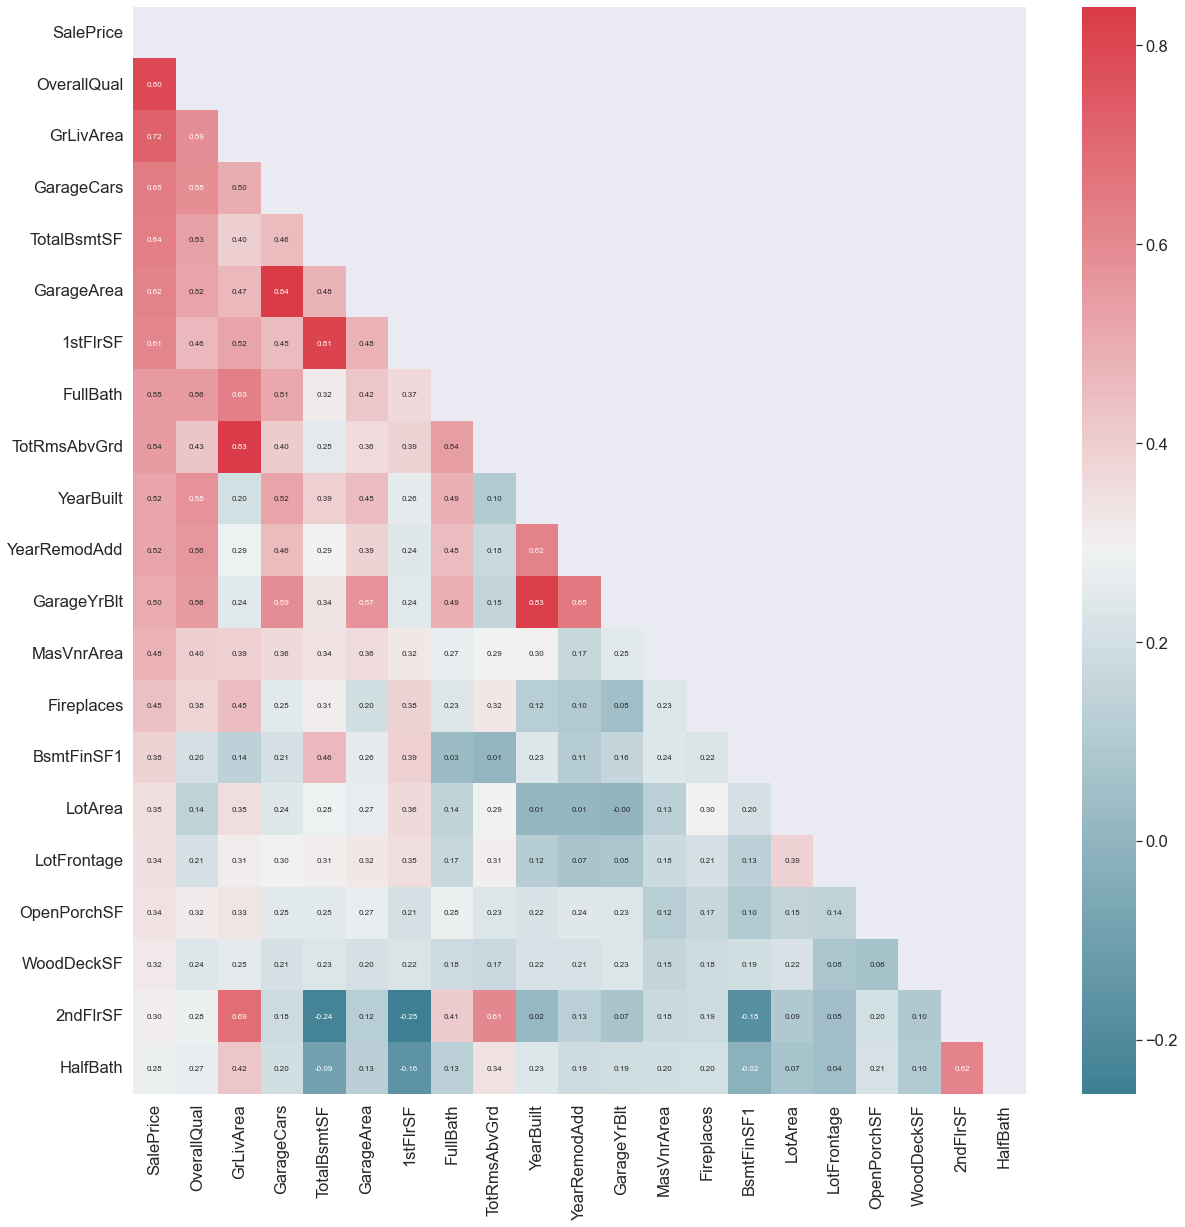

In [23]:
sns.set(font_scale = 1.5)
corr = housing_df_main[housing_df_main.SalePrice>1].corr()
top_corr_cols = corr[abs((corr.SalePrice)>=.26)].SalePrice.sort_values(ascending=False).keys()
top_corr = corr.loc[top_corr_cols, top_corr_cols]
dropSelf = np.zeros_like(top_corr)
dropSelf[np.triu_indices_from(dropSelf)] = True
plt.figure(figsize=(20, 20))
sns.heatmap(top_corr, cmap=sns.diverging_palette(220, 10, as_cmap=True), annot=True, annot_kws={"fontsize":8}, fmt=".2f", mask=dropSelf)
sns.set(font_scale=0.5)
plt.show()
del corr, dropSelf, top_corr

**Observation** : The heatmap shows some useful insights:

Correlation of target variable(SalePrice) with independent variables:

Price is highly (positively) correlated with OverallQual(.79) and GrLivArea (0.73). We expect the overall quality of the house and size of the living area to have a greater influence on our value judgments about a property.

Others are : TotalBsmtSF,1stFlrSF,GarageCars,GarageArea

From the graph above, it also becomes clear the multicollinearity is an issue.

The correlation between GarageCars and GarageArea is very high (0.84), and has very close correlation with the SalePrice.
From total square feet of basement area (TotalBsmtSF) and first Floor square feet (1stFlrSF), we found 0.81 of correlation and same correlation with sale price (0.61).
Original construction date (YearBuilt) has a little more correlation with price (0.51) than GarageYrBlt (0.49), and a high correlation between them (0.83)
0.83 is the correlation between total rooms above grade not include bathrooms (TotRmsAbvGrd) and GrLivArea, but TotRmsAbvGrd has only 0.51 of correlation with sale price. Let's see their distributions and type of relation curve between the 10th features with largest correlation with sales price

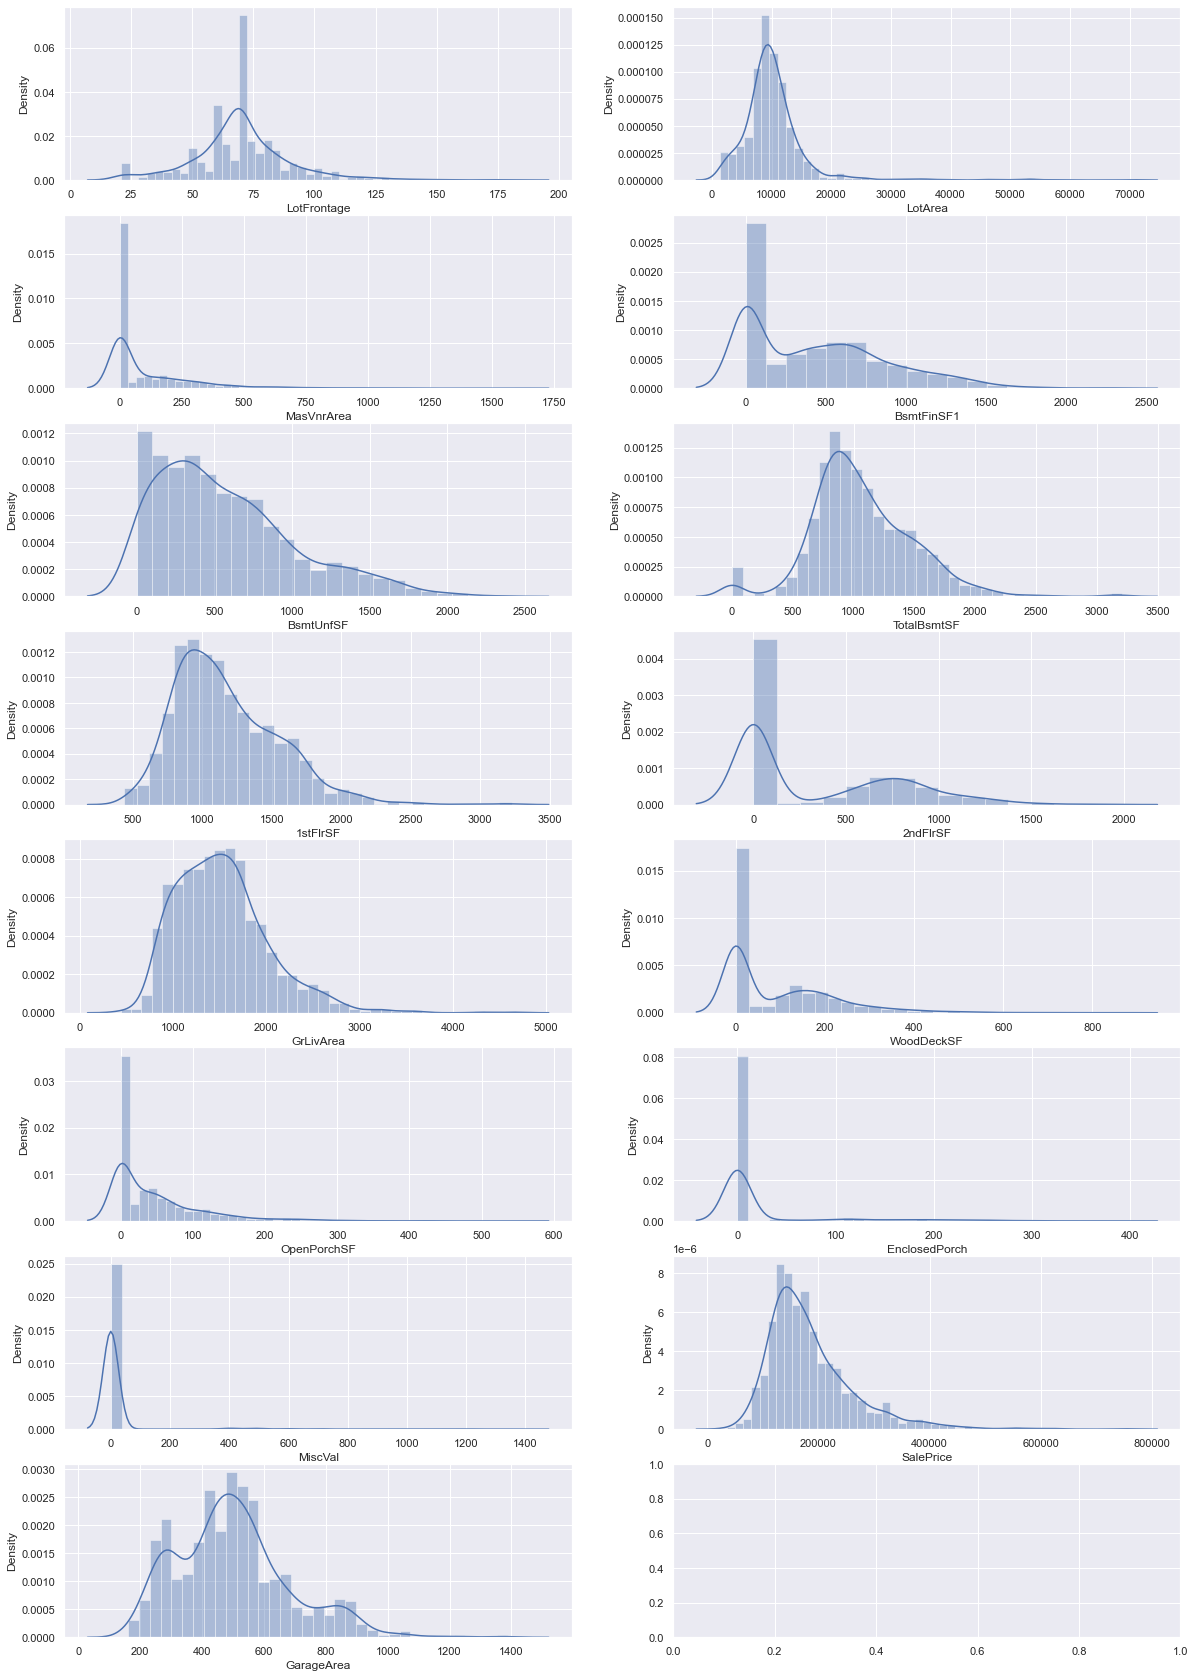

In [24]:
# Plotting histogram for continuous numerical columns
sns.set(font_scale = 1)
fig,ax = plt.subplots(nrows = 8,ncols = 2,figsize = [20,30])
sns.distplot(housing_df_main['LotFrontage'],ax = ax[0,0])
sns.distplot(housing_df_main['LotArea'],ax = ax[0,1])
sns.distplot(housing_df_main['MasVnrArea'],ax = ax[1,0])
sns.distplot(housing_df_main['BsmtFinSF1'],ax = ax[1,1])
sns.distplot(housing_df_main['BsmtUnfSF'],ax = ax[2,0])
sns.distplot(housing_df_main['TotalBsmtSF'],ax = ax[2,1])
sns.distplot(housing_df_main['1stFlrSF'],ax = ax[3,0])
sns.distplot(housing_df_main['2ndFlrSF'],ax = ax[3,1])
sns.distplot(housing_df_main['GrLivArea'],ax = ax[4,0])
sns.distplot(housing_df_main['WoodDeckSF'],ax = ax[4,1])
sns.distplot(housing_df_main['OpenPorchSF'],ax = ax[5,0])
sns.distplot(housing_df_main['EnclosedPorch'],ax = ax[5,1])
sns.distplot(housing_df_main['MiscVal'],ax = ax[6,0])
sns.distplot(housing_df_main['SalePrice'],ax = ax[6,1])
sns.distplot(housing_df_main['GarageArea'],ax = ax[7,0])
plt.show()

### Correlations for numeric variables

<AxesSubplot:xlabel='WoodDeckSF', ylabel='SalePrice'>

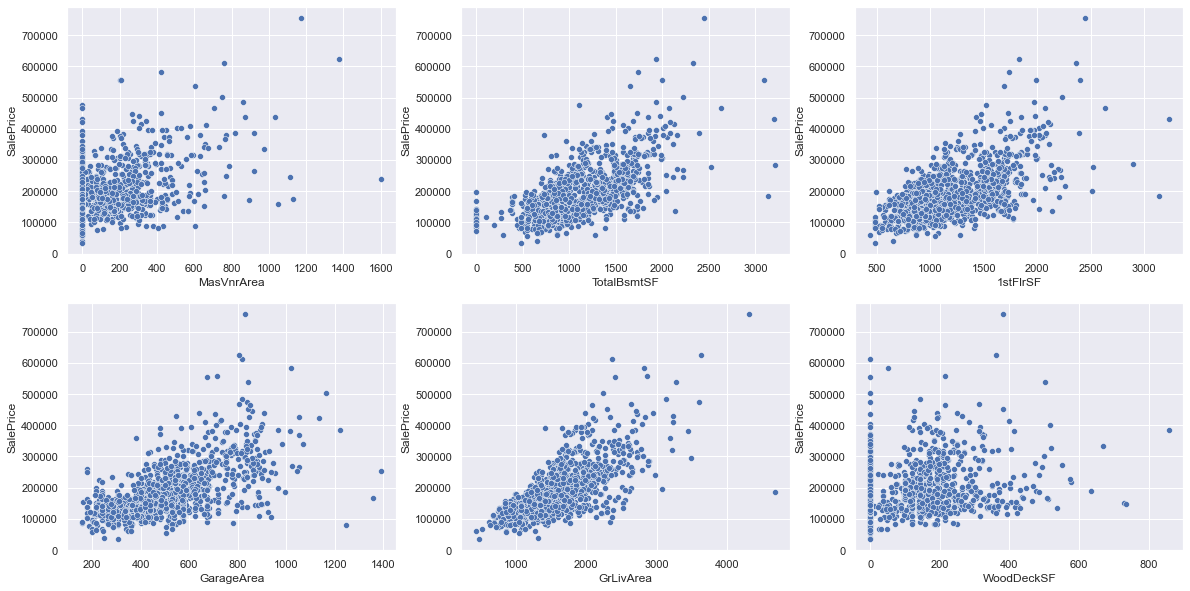

In [25]:
plt.figure(figsize=(20,10))
sns.set(font_scale = 1)
plt.subplot(2,3,1)
sns.scatterplot(x=housing_df_main.MasVnrArea,y=housing_df_main.SalePrice)
plt.subplot(2,3,2)
sns.scatterplot(x=housing_df_main.TotalBsmtSF,y=housing_df_main.SalePrice)
plt.subplot(2,3,3)
sns.scatterplot(x=housing_df_main['1stFlrSF'],y=housing_df_main.SalePrice)
plt.subplot(2,3,4)
sns.scatterplot(x=housing_df_main['GarageArea'],y=housing_df_main.SalePrice)
plt.subplot(2,3,5)
sns.scatterplot(x=housing_df_main['GrLivArea'],y=housing_df_main.SalePrice)
plt.subplot(2,3,6)
sns.scatterplot(x=housing_df_main['WoodDeckSF'],y=housing_df_main.SalePrice)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'CollgCr'),
  Text(1, 0, 'Veenker'),
  Text(2, 0, 'Crawfor'),
  Text(3, 0, 'NoRidge'),
  Text(4, 0, 'Mitchel'),
  Text(5, 0, 'Somerst'),
  Text(6, 0, 'NWAmes'),
  Text(7, 0, 'OldTown'),
  Text(8, 0, 'BrkSide'),
  Text(9, 0, 'Sawyer'),
  Text(10, 0, 'NridgHt'),
  Text(11, 0, 'NAmes'),
  Text(12, 0, 'SawyerW'),
  Text(13, 0, 'IDOTRR'),
  Text(14, 0, 'MeadowV'),
  Text(15, 0, 'Timber'),
  Text(16, 0, 'Gilbert'),
  Text(17, 0, 'StoneBr'),
  Text(18, 0, 'ClearCr'),
  Text(19, 0, 'Edwards'),
  Text(20, 0, 'NPkVill'),
  Text(21, 0, 'Blmngtn'),
  Text(22, 0, 'BrDale'),
  Text(23, 0, 'SWISU'),
  Text(24, 0, 'Blueste')])

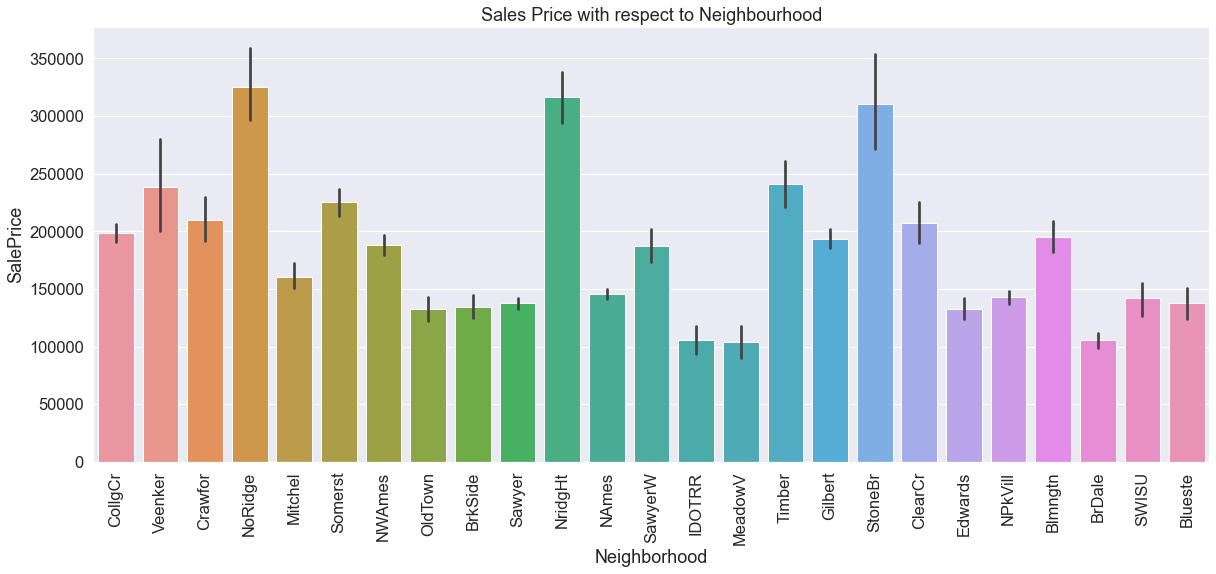

In [26]:
# plot 'Sale Price' with respect to 'Neighborhood'
sns.set(font_scale = 1.5)
plt.figure(figsize=(20, 8))
sns.barplot(x="Neighborhood", y="SalePrice", data= housing_df_main)
plt.title("Sales Price with respect to Neighbourhood")
plt.xticks(rotation=90)

##### Sale price of properties in few neighbourhoods seems to be quite high

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, '2'),
  Text(1, 0, '3'),
  Text(2, 0, '4'),
  Text(3, 0, '5'),
  Text(4, 0, '6'),
  Text(5, 0, '7'),
  Text(6, 0, '8'),
  Text(7, 0, '9')])

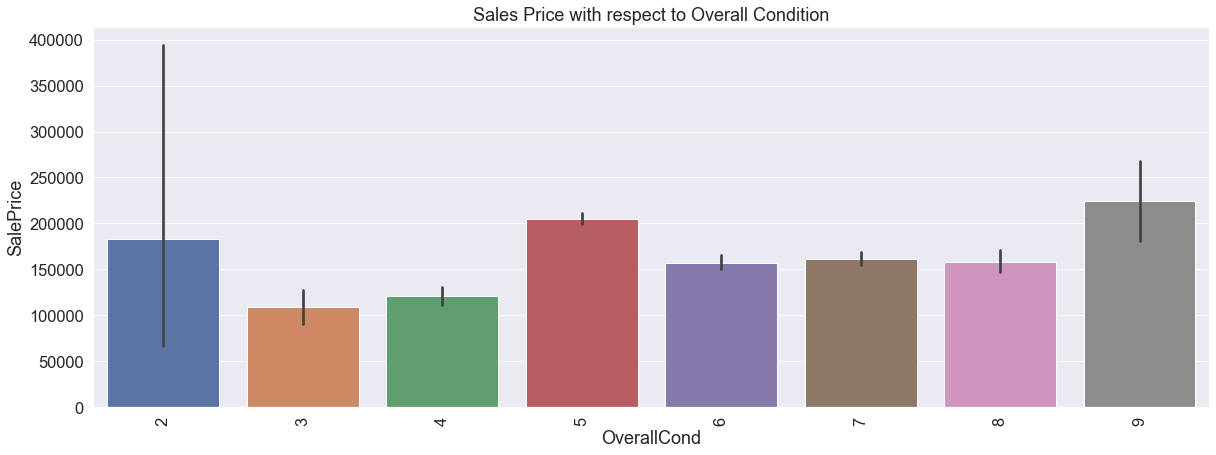

In [27]:
# plot 'overall condition' with respect to 'Saleprice'
sns.set(font_scale = 1.5)
plt.figure(figsize=(20, 7))
sns.barplot(x="OverallCond", y="SalePrice", data= housing_df_main)
plt.title("Sales Price with respect to Overall Condition")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '2'),
  Text(1, 0, '3'),
  Text(2, 0, '4'),
  Text(3, 0, '5'),
  Text(4, 0, '6'),
  Text(5, 0, '7'),
  Text(6, 0, '8'),
  Text(7, 0, '9'),
  Text(8, 0, '10')])

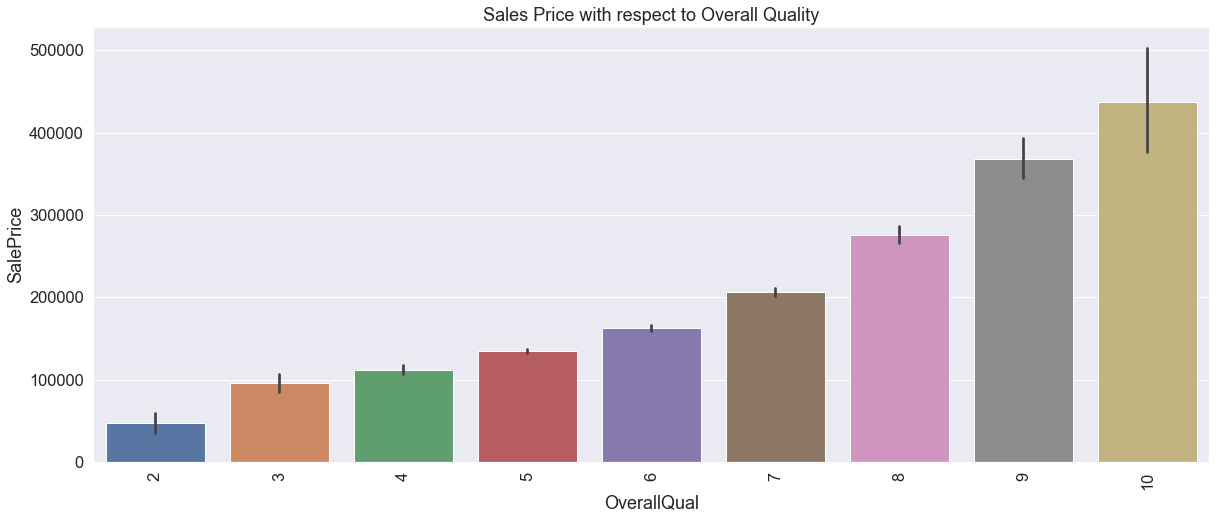

In [28]:
# plot 'overall quality' with respect to 'Saleprice'
plt.figure(figsize=(20, 8))
sns.barplot(x="OverallQual", y="SalePrice", data= housing_df_main)
plt.title("Sales Price with respect to Overall Quality")
plt.xticks(rotation=90)

#### Observation: Increase in the overall quality has a direct positive effect on the sale price

In [29]:
def QQ_plot(data, measure):
    fig = plt.figure(figsize=(20,7))

    #Get the fitted parameters used by the function
    (mu, sigma) = norm.fit(data)

    #Kernel Density plot
    fig1 = fig.add_subplot(121)
    sns.distplot(data, fit=norm)
    fig1.set_title(measure + ' Distribution ( mu = {:.2f} and sigma = {:.2f} )'.format(mu, sigma), loc='center')
    fig1.set_xlabel(measure)
    fig1.set_ylabel('Frequency')

    plt.tight_layout()
    plt.show()

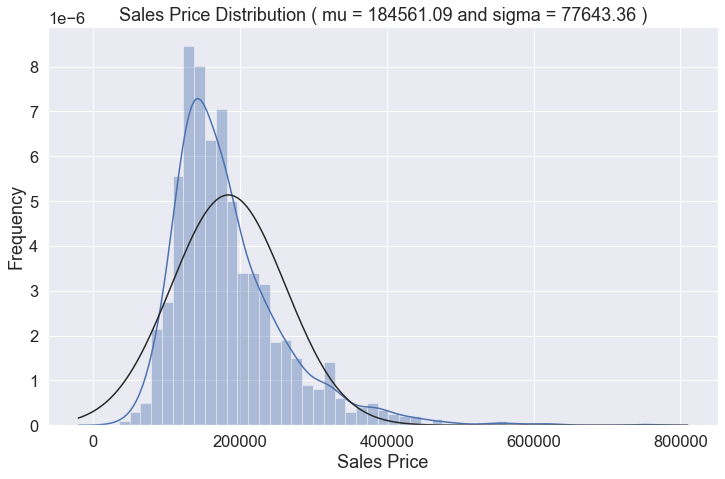

In [30]:
QQ_plot(housing_df_main.SalePrice, 'Sales Price')

In [31]:
# correlation matrix
cor = housing_df_main[numerical_cols].corr()
cor

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000,-0.398,-0.284,0.055,-0.098,0.061,0.042,0.038,-0.074,-0.079,-0.140,-0.260,-0.266,0.308,0.018,0.072,-0.014,-0.001,0.123,0.199,-0.063,0.243,0.016,-0.030,0.087,0.011,-0.069,-0.021,-0.003,-0.028,-0.038,-0.021,NaN,-0.052,-0.020,-0.022,-0.080
LotFrontage,-0.398,1.000,0.390,0.210,-0.045,0.115,0.073,0.178,0.132,0.034,0.145,0.309,0.352,0.052,-0.023,0.307,0.062,-0.010,0.165,0.041,0.248,0.004,0.305,0.207,0.080,0.296,0.324,0.083,0.142,-0.010,0.061,0.043,NaN,0.008,0.028,0.013,0.344
LotArea,-0.284,0.390,1.000,0.139,-0.014,0.009,0.012,0.127,0.204,0.074,0.037,0.284,0.362,0.095,0.010,0.355,0.131,0.020,0.143,0.066,0.190,-0.010,0.291,0.296,-0.001,0.238,0.266,0.218,0.151,-0.013,0.047,0.093,NaN,0.004,0.005,-0.028,0.352
OverallQual,0.055,0.210,0.139,1.000,-0.134,0.577,0.562,0.397,0.203,-0.076,0.326,0.534,0.461,0.281,-0.025,0.589,0.100,-0.061,0.556,0.269,0.077,-0.172,0.426,0.378,0.555,0.584,0.523,0.236,0.317,-0.117,0.020,0.052,NaN,-0.078,0.072,-0.020,0.795
OverallCond,-0.098,-0.045,-0.014,-0.134,1.000,-0.404,0.044,-0.131,-0.044,0.044,-0.145,-0.185,-0.150,0.021,0.057,-0.090,-0.057,0.126,-0.218,-0.055,0.014,-0.100,-0.069,-0.032,-0.324,-0.243,-0.189,-0.008,-0.054,0.079,0.038,0.061,NaN,0.083,-0.012,0.049,-0.097
YearBuilt,0.061,0.115,0.009,0.577,-0.404,1.000,0.623,0.298,0.234,-0.065,0.158,0.391,0.262,0.018,-0.152,0.200,0.184,-0.048,0.487,0.233,-0.071,-0.168,0.102,0.118,0.826,0.525,0.448,0.216,0.221,-0.380,0.021,-0.071,NaN,-0.091,0.010,-0.009,0.520
YearRemodAdd,0.042,0.073,0.012,0.562,0.044,0.623,1.000,0.168,0.112,-0.074,0.191,0.295,0.239,0.129,-0.067,0.286,0.116,-0.024,0.451,0.186,-0.069,-0.174,0.177,0.098,0.649,0.455,0.386,0.214,0.239,-0.218,0.047,-0.048,NaN,-0.099,0.021,0.039,0.518
MasVnrArea,0.038,0.178,0.127,0.397,-0.131,0.298,0.168,1.000,0.236,-0.076,0.116,0.344,0.324,0.177,-0.059,0.392,0.077,0.015,0.271,0.195,0.112,-0.018,0.288,0.229,0.248,0.365,0.360,0.154,0.118,-0.104,0.026,0.055,NaN,-0.057,-0.005,-0.006,0.481
BsmtFinSF1,-0.074,0.132,0.204,0.203,-0.044,0.234,0.112,0.236,1.000,-0.066,-0.525,0.462,0.394,-0.176,-0.063,0.136,0.653,0.064,0.029,-0.019,-0.133,-0.068,0.009,0.224,0.157,0.208,0.258,0.194,0.099,-0.110,0.045,0.060,NaN,-0.013,-0.000,0.019,0.383
BsmtFinSF2,-0.079,0.034,0.074,-0.076,0.044,-0.065,-0.074,-0.076,-0.066,1.000,-0.209,0.100,0.092,-0.112,0.002,-0.029,0.148,0.076,-0.097,-0.040,-0.014,-0.041,-0.053,0.028,-0.085,-0.078,-0.049,0.066,0.008,0.042,-0.031,0.076,NaN,-0.030,-0.017,0.036,-0.032


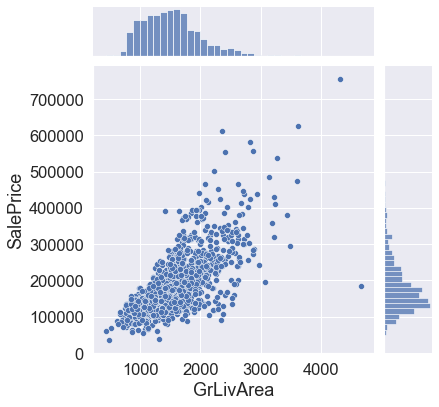

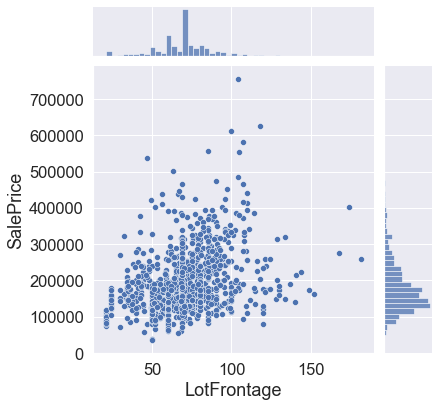

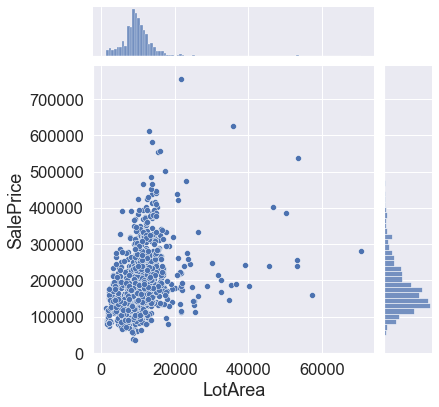

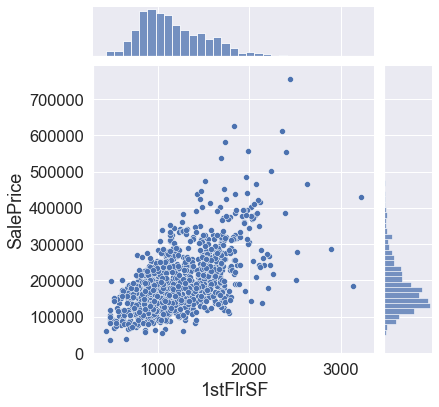

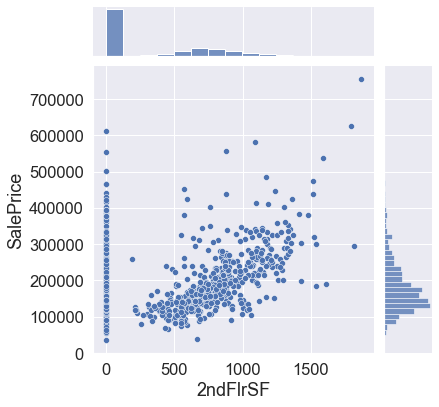

In [32]:
# Analyse some important numeric columns
y = 'SalePrice'
sns.jointplot(x = 'GrLivArea', y=y, data=housing_df_main)
sns.jointplot(x = 'LotFrontage', y=y,data=housing_df_main)
sns.jointplot(x = 'LotArea', y=y,data=housing_df_main)
sns.jointplot(x = '1stFlrSF', y=y,data=housing_df_main)
sns.jointplot(x = '2ndFlrSF', y =y, data=housing_df_main)
plt.show()

##### Observation: Ground or First level houses i.e. '0' second floor Sq.Ft has also a steady increase

#### We can derive a column for 'Age of the property' when it was sold: Name it as 'PropAge'

### Deriving Columns

In [33]:
# PropAge -  Property Age from yearsold - yearbuilt
housing_df_main['PropAge'] = (housing_df_main['YrSold'] - housing_df_main['YearBuilt'])
housing_df_main.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,PropAge
0,60,RL,65.000,8450,Reg,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NA,Attchd,2003.000,RFn,2,548,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500,5
1,20,RL,80.000,9600,Reg,Lvl,FR2,Gtl,Veenker,Feedr,1Fam,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,None,0.000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.000,RFn,2,460,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500,31
2,60,RL,68.000,11250,IR1,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.000,RFn,2,608,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500,7
3,70,RL,60.000,9550,IR1,Lvl,Corner,Gtl,Crawfor,Norm,1Fam,2Story,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,None,0.000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.000,Unf,3,642,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000,91
4,60,RL,84.000,14260,IR1,Lvl,FR2,Gtl,NoRidge,Norm,1Fam,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,BrkFace,350.000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.000,RFn,3,836,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000,8


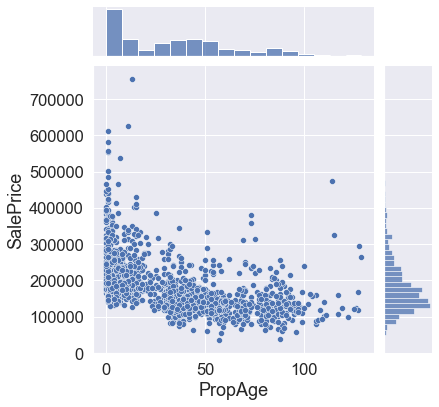

In [34]:
# PropAge vs SalePrice
sns.jointplot(x = housing_df_main['PropAge'], y = housing_df_main['SalePrice'])
plt.show()

#### Increase in Property Age shows a decreasing saleprice trend i.e newer the property, high is the value

In [35]:
# Now we can drop the column Month sold and Year Sold, Year built and Year remodelled since it will not be required further
housing_df_main = housing_df_main.drop(['MoSold'], axis = 1)
housing_df_main = housing_df_main.drop(['YrSold'], axis = 1)
housing_df_main = housing_df_main.drop(['YearBuilt'], axis = 1)
housing_df_main = housing_df_main.drop(['YearRemodAdd'], axis = 1)
housing_df_main.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SaleType,SaleCondition,SalePrice,PropAge
0,60,RL,65.000,8450,Reg,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,196.000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NA,Attchd,2003.000,RFn,2,548,TA,Y,0,61,0,0,0,0,0,WD,Normal,208500,5
1,20,RL,80.000,9600,Reg,Lvl,FR2,Gtl,Veenker,Feedr,1Fam,1Story,6,8,Gable,MetalSd,MetalSd,None,0.000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.000,RFn,2,460,TA,Y,298,0,0,0,0,0,0,WD,Normal,181500,31
2,60,RL,68.000,11250,IR1,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,162.000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.000,RFn,2,608,TA,Y,0,42,0,0,0,0,0,WD,Normal,223500,7
3,70,RL,60.000,9550,IR1,Lvl,Corner,Gtl,Crawfor,Norm,1Fam,2Story,7,5,Gable,Wd Sdng,Wd Shng,None,0.000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.000,Unf,3,642,TA,Y,0,35,272,0,0,0,0,WD,Abnorml,140000,91
4,60,RL,84.000,14260,IR1,Lvl,FR2,Gtl,NoRidge,Norm,1Fam,2Story,8,5,Gable,VinylSd,VinylSd,BrkFace,350.000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.000,RFn,3,836,TA,Y,192,84,0,0,0,0,0,WD,Normal,250000,8


## Data Preparation for Models

In [36]:
#type of each feature in data: int, float, object
types = housing_df_main.dtypes
#numerical values are either type int or float
numeric_type = types[(types == 'int64') | (types == float)] 
#categorical values are type object
categorical_type = types[types == object]

In [37]:
pd.DataFrame(types).reset_index().set_index(0).reset_index()[0].value_counts()

object     33
int64      31
float64     3
Name: 0, dtype: int64

In [38]:
#we should convert numeric_type to a list to make it easier to work with
numerical_columns = list(numeric_type.index)
print(numerical_columns)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice', 'PropAge']


In [39]:
#Categorical columns
categorical_columns = list(categorical_type.index)
print(categorical_columns)

['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'PavedDrive', 'SaleType', 'SaleCondition']


### Dummy Variables Assignment

In [40]:
dummy_cols = pd.get_dummies(housing_df_main[categorical_columns])
housing_df_main = pd.concat([housing_df_main,dummy_cols],axis='columns')
housing_df_main = housing_df_main.drop(categorical_columns,axis='columns')

In [41]:
housing_df_main.shape

(1359, 246)

In [42]:
## Numerical columns in data set are :
numerical_cols=list(housing_df_main.dtypes[housing_df_main.dtypes!='object'].index)
print("Number of numerical columns are : ",len(numerical_cols))
## Categorical columns in data set are :
categorical_cols=list(housing_df_main.dtypes[housing_df_main.dtypes=='object'].index)
print("Number of categorical columns are : ",len(categorical_cols))

Number of numerical columns are :  246
Number of categorical columns are :  0


## Scaling and test-train split

In [43]:
housing_df_main_train,housing_df_main_test = train_test_split(housing_df_main, train_size = 0.7, random_state = 42)

In [44]:
housing_df_main_train.shape

(951, 246)

In [45]:
housing_df_main_test.shape

(408, 246)

In [46]:
# Instantiating objects
scaler = MinMaxScaler()

In [47]:
# Identifying columns which need scaling
num_scaling = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 
               'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
               'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces',
               'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
               'MiscVal','SalePrice','PropAge']

In [48]:
# Let us use fit and transform now
housing_df_main_train[num_scaling] = scaler.fit_transform(housing_df_main_train[num_scaling])
housing_df_main_test[num_scaling] = scaler.fit_transform(housing_df_main_test[num_scaling])

In [49]:
#Checking the values now
housing_df_main_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,PropAge,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,...,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NA,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
355,0.000,0.522,0.141,0.500,0.429,0.000,0.148,0.483,322,0.374,0.262,0.000,0.000,0.172,0.500,0.000,0.667,0.000,0.500,0.000,6,0.000,1995.000,2,0.293,0.000,0.052,0.000,0.000,0.000,0.000,0.000,0.198,0.094,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1116,0.353,0.298,0.091,0.750,0.429,0.000,0.156,0.000,55,0.127,0.109,0.342,0.000,0.224,0.500,0.000,0.667,0.500,0.500,0.000,7,0.333,2002.000,2,0.298,0.165,0.000,0.000,0.000,0.000,0.000,0.000,0.207,0.055,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
344,0.824,0.093,0.016,0.375,0.143,0.000,0.057,0.206,175,0.167,0.020,0.308,0.000,0.151,0.000,0.000,0.333,0.500,0.500,0.000,4,0.000,1976.000,1,0.143,0.250,0.000,0.000,0.000,0.000,0.000,0.000,0.069,0.266,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1295,0.000,0.304,0.100,0.375,0.429,0.105,0.450,0.000,36,0.328,0.208,0.000,0.000,0.136,0.500,0.000,0.333,0.500,0.500,0.000,5,0.000,1968.000,1,0.104,0.489,0.000,0.000,0.000,0.000,0.000,0.000,0.143,0.297,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
86,0.235,0.627,0.151,0.500,0.429,0.000,0.000,0.000,684,0.213,0.074,0.468,0.000,0.257,0.000,0.000,0.667,0.500,0.500,0.000,6,0.333,2005.000,2,0.195,0.137,0.076,0.000,0.000,0.000,0.000,0.000,0.193,0.031,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [50]:
# Splitting in y_train and X_train
y_train = housing_df_main_train.pop('SalePrice')
X_train = housing_df_main_train

In [51]:
# Splitting in y_test and X_test
y_test = housing_df_main_test.pop('SalePrice')
X_test = housing_df_main_test

## Model Building & Evaluation

In [52]:
# Importing RFE and LinearRegression
# Since there are more variables to be analysed, we will used the automated feature elimination process (RFE)
# Running RFE 
# Since there are more than 200 variables for analysis, we will run RFE to select some that have high predictive power
lm = LinearRegression()
lm.fit(X_train, y_train)
# running RFE for top 50 variables
rfe = RFE(lm,n_features_to_select=50)            
rfe = rfe.fit(X_train, y_train)

In [53]:
# Check the ranks
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 177),
 ('LotFrontage', False, 188),
 ('LotArea', False, 173),
 ('OverallQual', False, 165),
 ('OverallCond', False, 169),
 ('MasVnrArea', False, 175),
 ('BsmtFinSF1', False, 172),
 ('BsmtFinSF2', False, 189),
 ('BsmtUnfSF', False, 191),
 ('TotalBsmtSF', False, 166),
 ('1stFlrSF', False, 163),
 ('2ndFlrSF', False, 162),
 ('LowQualFinSF', False, 164),
 ('GrLivArea', False, 161),
 ('BsmtFullBath', False, 183),
 ('BsmtHalfBath', False, 186),
 ('FullBath', False, 178),
 ('HalfBath', False, 187),
 ('BedroomAbvGr', False, 181),
 ('KitchenAbvGr', False, 167),
 ('TotRmsAbvGrd', False, 185),
 ('Fireplaces', False, 168),
 ('GarageYrBlt', False, 196),
 ('GarageCars', False, 184),
 ('GarageArea', False, 171),
 ('WoodDeckSF', False, 182),
 ('OpenPorchSF', False, 190),
 ('EnclosedPorch', False, 180),
 ('3SsnPorch', False, 170),
 ('ScreenPorch', False, 176),
 ('PoolArea', False, 192),
 ('MiscVal', False, 179),
 ('PropAge', False, 174),
 ('MSZoning_C (all)', False, 156),
 ('MSZon

In [54]:
# Select the top 50 variables

col = X_train.columns[rfe.support_]
col

Index(['ExterQual_Ex', 'ExterQual_Fa', 'ExterQual_Gd', 'ExterQual_TA',
       'Foundation_BrkTil', 'Foundation_CBlock', 'Foundation_PConc',
       'Foundation_Slab', 'Foundation_Stone', 'Foundation_Wood', 'BsmtQual_NA',
       'BsmtCond_Fa', 'BsmtCond_Gd', 'BsmtCond_TA', 'BsmtExposure_NA',
       'BsmtFinType2_ALQ', 'BsmtFinType2_BLQ', 'BsmtFinType2_GLQ',
       'BsmtFinType2_LwQ', 'BsmtFinType2_NA', 'BsmtFinType2_Rec',
       'BsmtFinType2_Unf', 'HeatingQC_Ex', 'HeatingQC_Fa', 'HeatingQC_Gd',
       'HeatingQC_Po', 'HeatingQC_TA', 'Electrical_FuseA', 'Electrical_FuseF',
       'Electrical_FuseP', 'Electrical_SBrkr', 'GarageType_2Types',
       'GarageType_Attchd', 'GarageType_Basment', 'GarageType_BuiltIn',
       'GarageType_CarPort', 'GarageType_Detchd', 'GarageFinish_Fin',
       'GarageFinish_RFn', 'GarageFinish_Unf', 'GarageQual_Po', 'SaleType_COD',
       'SaleType_CWD', 'SaleType_Con', 'SaleType_ConLD', 'SaleType_ConLI',
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 

In [55]:
X_train.columns[~rfe.support_]

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       ...
       'GarageQual_TA', 'PavedDrive_N', 'PavedDrive_P', 'PavedDrive_Y',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=195)

In [56]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [57]:
X_train_rfe = pd.DataFrame(X_train[col])

In [58]:
X_train_rfe.head()

,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_NA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_TA,BsmtExposure_NA,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NA,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Po,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
355,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1116,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
344,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1295,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
86,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


In [59]:
X_train_rfe.shape

(951, 50)

In [60]:
# predict
y_pred_train = lm.predict(X_train)
metrics.r2_score(y_true=y_train, y_pred=y_pred_train)

0.9150972671723792

In [61]:
y_pred_test = lm.predict(X_test)
metrics.r2_score(y_true=y_test, y_pred=y_pred_test)

-2.547801348763373e+17

In [62]:
metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("R2 train : ",r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("R2 test : ",r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("RSS train : ",rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS test : ",rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("MSE train : ",mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("MSE test : ",mse_test_lr)
metric.append(mse_test_lr**0.5)

R2 train :  0.9150972671723792
R2 test :  -2.547801348763373e+17
RSS train :  0.9186065908658048
RSS test :  2.0370873521146278e+18
MSE train :  0.0009659375298273447
MSE test :  4992861157143696.0


#### Conclusion: The above metrics are all over the place and needs correction, the R2 Test value is extremely low

## Model Building using Ridge & Lasso

In [63]:
# Checking the dimension of X_train & y_train
print("X_train", X_train.shape)
print("y_train", y_train.shape)

X_train (951, 245)
y_train (951,)


### Ridge Regression

In [64]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20 ]}

ridge = Ridge()
# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring='neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

#### Optimal Lambda for Ridge Regression

In [65]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 4.0}
-0.025034340636746


In [66]:
#Fitting Ridge model for alpha = 4 and printing coefficients which have been penalised
ridge = Ridge(alpha=4)
ridge.fit(X_train, y_train)

Ridge(alpha=4)

#### Model Coefficients

In [67]:
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = X_train.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feature','Coef']

In [68]:
# Top 10 features along with their coefficients with Ridge Regression
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

,Feature,Coef
0,MSSubClass,0.092
14,BsmtFullBath,0.060
4,OverallCond,0.060
12,LowQualFinSF,0.054
11,2ndFlrSF,0.053
70,Neighborhood_NridgHt,0.048
7,BsmtFinSF2,0.047
5,MasVnrArea,0.043
77,Neighborhood_Timber,0.039
10,1stFlrSF,0.037


#### Model Analysis

In [69]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("R2 train : ",r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("R2 test : ",r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("RSS train : ",rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS test : ",rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("MSE train : ",mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("MSE test : ",mse_test_lr)
metric2.append(mse_test_lr**0.5)

R2 train :  0.906412382717861
R2 test :  0.8759824520597261
RSS train :  1.0125728489016468
RSS test :  0.9915787919337694
MSE train :  0.0010647453721363267
MSE test :  0.0024303401763082584


#### Residual Analysis on Ridge

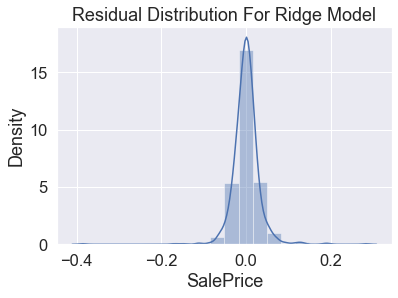

In [70]:
res = y_train - y_pred_train
sns.distplot(res,bins=20)
plt.title('Residual Distribution For Ridge Model')
plt.show()

### Lasso Regression

In [71]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

#### Optimal value for Lasso

In [72]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


In [73]:
#Fitting Lasso model for alpha = 0.0001 and printing coefficients which have been penalised

alpha =0.0001
lasso = Lasso(alpha=alpha)       
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0001)

#### Model Coefficients

In [74]:
model_lasso_param = list(lasso.coef_)
model_lasso_param.insert(0,lasso.intercept_)
cols = X_train.columns
cols.insert(0,'constant')
lasso_coef = pd.DataFrame(list(zip(cols,model_lasso_param)))
lasso_coef.columns = ['Feature','Coef']

In [75]:
# Top 10 features along with their coefficients with Lasso Regression
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

,Feature,Coef
14,BsmtFullBath,0.225
4,OverallCond,0.082
70,Neighborhood_NridgHt,0.053
5,MasVnrArea,0.052
77,Neighborhood_Timber,0.047
7,BsmtFinSF2,0.047
142,ExterQual_Fa,0.046
3,OverallQual,0.043
10,1stFlrSF,0.041
71,Neighborhood_OldTown,0.031


In [76]:
#Number of parameters selected by the Lasso regression, as lasso use to do feature selection by converging not required feature 
# cofficent value as 0
lasso_coef = lasso_coef.loc[lasso_coef['Coef'] != 0]
lasso_coef

,Feature,Coef
0,MSSubClass,-0.073
3,OverallQual,0.043
4,OverallCond,0.082
5,MasVnrArea,0.052
6,BsmtFinSF1,0.029
...,...,...
224,GarageQual_Gd,-0.006
230,SaleType_COD,0.002
237,SaleType_Oth,0.025
239,SaleCondition_Abnorml,-0.003


In [77]:
#Number of parameters selected by the Lasso regression, Minus one as we have constant present in lasso_params_df
len(lasso_coef)-1

115

#### Model Analysis

In [78]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("R2 train : ",r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("R2 test : ",r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("RSS train : ",rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS test : ",rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("MSS train : ",mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("MSS test : ",mse_test_lr)
metric3.append(mse_test_lr**0.5)

R2 train :  0.904810964615027
R2 test :  0.8832439324486729
RSS train :  1.0298994198493912
RSS test :  0.9335198311551689
MSS train :  0.0010829646896418413
MSS test :  0.0022880388018509043


#### Residual Analysis on Lasso

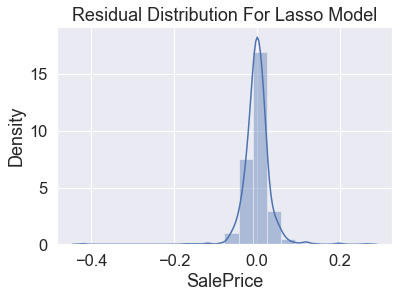

In [79]:
res = y_train - y_pred_train
sns.distplot(res,bins=20)
plt.title('Residual Distribution For Lasso Model')
plt.show()

## Comparison between Ridge vs Lasso vs Linear Regression

In [80]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.915,0.906,0.905
1,R2 Score (Test),-254780134876337312.000,0.876,0.883
2,RSS (Train),0.919,1.013,1.030
3,RSS (Test),2037087352114627840.000,0.992,0.934
4,MSE (Train),0.031,0.033,0.033
5,MSE (Test),70660180.846,0.049,0.048


### Change after Regularization

In [81]:
X=housing_df_main.loc[:, housing_df_main.columns != 'SalePrice']
betas = pd.DataFrame(index=X.columns)
betas.rows = X.columns

In [82]:
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_
pd.set_option('display.max_rows', None)
betas.head(100)

,Linear,Ridge,Lasso
MSSubClass,-0.017,-0.009,-0.000
LotFrontage,-0.007,0.001,0.000
LotArea,0.045,0.032,0.043
OverallQual,0.062,0.060,0.082
OverallCond,0.059,0.043,0.052
MasVnrArea,0.033,0.033,0.029
BsmtFinSF1,-310488741.787,0.047,0.047
BsmtFinSF2,-154832217.717,0.009,0.000
BsmtUnfSF,-137384.399,0.000,0.000
TotalBsmtSF,440454383.375,0.037,0.041


## Conclusion

### Ridge Regression

- Top 10 features of the ridge

In [83]:
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

,Feature,Coef
0,MSSubClass,0.092
14,BsmtFullBath,0.060
4,OverallCond,0.060
12,LowQualFinSF,0.054
11,2ndFlrSF,0.053
70,Neighborhood_NridgHt,0.048
7,BsmtFinSF2,0.047
5,MasVnrArea,0.043
77,Neighborhood_Timber,0.039
10,1stFlrSF,0.037


- **Metrics**

#### R2 Score (Train) - 0.906 and R2 Score (Test) - 0.876 and optimal lambda - 4

### Lasso Regression

 - Top 10 features of the ridge

In [84]:
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

,Feature,Coef
14,BsmtFullBath,0.225
4,OverallCond,0.082
70,Neighborhood_NridgHt,0.053
5,MasVnrArea,0.052
77,Neighborhood_Timber,0.047
7,BsmtFinSF2,0.047
142,ExterQual_Fa,0.046
3,OverallQual,0.043
10,1stFlrSF,0.041
71,Neighborhood_OldTown,0.031


- **Metrics**

#### R2 Score (Train) - 0.905 and R2 Score (Test) - 0.883 and optimal lambda - 0.0001

## Summary

**Comparing both the models ,common variables which are significant in predicting the price of a house:**
  - BsmtFullBath : Basement full bathrooms
  - OverallCond : Rates the overall condition of the house
  - Neighborhood_NridgHt : Northridge Heights Neighbourhood of Ames city limits
  - BsmtFinSF2 : Type 2 finished square feet
  - 1stFlrSF : First Floor square feet
  - MasVnrArea : Masonry veneer area in square feet
  - Neighborhood_Timber : Timber Neighbourhood of Ames city limits

## Subjective Questions

### Question 1

**Question:**
 - What is the optimal value of alpha for ridge and lasso regression? 
 - What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? 
 - What will be the most important predictor variables after the change is implemented?

### Solution1:

1) Optimal value of alpha for Ridge regression=4 and for Lasso=0.0001

2) Calculations for Doubling the alpha values

#### Ridge Regression

In [85]:
#Fitting Ridge model for alpha = 8 and printing coefficients which have been penalised
ridge_doubled = Ridge(alpha=8)
ridge_doubled.fit(X_train, y_train)

Ridge(alpha=8)

In [86]:
model_parameter_doubled = list(ridge_doubled.coef_)
model_parameter_doubled.insert(0,ridge_doubled.intercept_)
cols = X_train.columns
cols.insert(0,'constant')
ridge_coef_doubled = pd.DataFrame(list(zip(cols,model_parameter_doubled)))
ridge_coef_doubled.columns = ['Feature','Coef']

In [87]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge_doubled.predict(X_train)
y_pred_test = ridge_doubled.predict(X_test)

metric4 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("R2 train : ",r2_train_lr)
metric4.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("R2 test : ",r2_test_lr)
metric4.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("RSS train : ",rss1_lr)
metric4.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS test : ",rss2_lr)
metric4.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("MSE train : ",mse_train_lr)
metric4.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("MSE test : ",mse_test_lr)
metric4.append(mse_test_lr**0.5)

R2 train :  0.8996804704649191
R2 test :  0.86940376354287
RSS train :  1.0854088903190429
RSS test :  1.04417850963819
MSE train :  0.0011413342695258074
MSE test :  0.0025592610530347794


##### Metrics comparison with doubled alpha

In [88]:
# Creating a table which contain all the metrics

lr_table2 = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Doubled Alpha': metric4
        }

lr_metric = pd.DataFrame(lr_table2 ,columns = ['Metric', 'Doubled Alpha'] )

rg_metric = pd.Series(metric2, name = 'Optimal Alpha')


final_metric = pd.concat([lr_metric, rg_metric], axis = 1)

final_metric

,Metric,Doubled Alpha,Optimal Alpha
0,R2 Score (Train),0.900,0.906
1,R2 Score (Test),0.869,0.876
2,RSS (Train),1.085,1.013
3,RSS (Test),1.044,0.992
4,MSE (Train),0.034,0.033
5,MSE (Test),0.051,0.049


###### Observation: Both train and test data the R2 score value has dropped and MSE has increased

##### Coefficients comparison with alpha doubled for Ridge Regression

In [89]:
# Top 10 features with alpha=8
ridge_coef_doubled.sort_values(by='Coef',ascending=False).head(10)

,Feature,Coef
0,MSSubClass,0.053
4,OverallCond,0.052
14,BsmtFullBath,0.046
70,Neighborhood_NridgHt,0.044
11,2ndFlrSF,0.042
7,BsmtFinSF2,0.042
12,LowQualFinSF,0.040
5,MasVnrArea,0.036
77,Neighborhood_Timber,0.032
10,1stFlrSF,0.032


In [90]:
# Top 10 features along with alpha=4
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

,Feature,Coef
0,MSSubClass,0.092
14,BsmtFullBath,0.060
4,OverallCond,0.060
12,LowQualFinSF,0.054
11,2ndFlrSF,0.053
70,Neighborhood_NridgHt,0.048
7,BsmtFinSF2,0.047
5,MasVnrArea,0.043
77,Neighborhood_Timber,0.039
10,1stFlrSF,0.037


###### Observation: On doubling the alpha, the model coefficients has reduced.

#### Lasso Regression

In [91]:
#Fitting Ridge model for alpha = 0.0002 and printing coefficients which have been penalised

alpha =0.0002

lasso_doubled = Lasso(alpha=alpha)
        
lasso_doubled.fit(X_train, y_train)

Lasso(alpha=0.0002)

In [92]:
model_lasso_param_doubled = list(lasso_doubled.coef_)
model_lasso_param_doubled.insert(0,lasso_doubled.intercept_)
cols_doubled = X_train.columns
cols_doubled.insert(0,'constant')
lasso_coef_doubled = pd.DataFrame(list(zip(cols_doubled,model_lasso_param_doubled)))
lasso_coef_doubled.columns = ['Feature','Coef']

##### Metrics Comparison

In [93]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso_doubled.predict(X_train)
y_pred_test = lasso_doubled.predict(X_test)

metric5 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("R2 train : ",r2_train_lr)
metric5.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("R2 test : ",r2_test_lr)
metric5.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("RSS train : ",rss1_lr)
metric5.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS test : ",rss2_lr)
metric5.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("MSS train : ",mse_train_lr)
metric5.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("MSS test : ",mse_test_lr)
metric5.append(mse_test_lr**0.5)

R2 train :  0.8966263673852849
R2 test :  0.8812658189962442
RSS train :  1.1184528115769319
RSS test :  0.9493357812367794
MSS train :  0.0011760807692712217
MSS test :  0.0023268033853842632


In [94]:
# Creating a table which contain all the metrics

lr_table2 = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Doubled Alpha': metric5
        }

lr_metric = pd.DataFrame(lr_table2 ,columns = ['Metric', 'Doubled Alpha'] )

rg_metric = pd.Series(metric3, name = 'Optimal Alpha')


final_metric = pd.concat([lr_metric, rg_metric], axis = 1)

final_metric

,Metric,Doubled Alpha,Optimal Alpha
0,R2 Score (Train),0.897,0.905
1,R2 Score (Test),0.881,0.883
2,RSS (Train),1.118,1.030
3,RSS (Test),0.949,0.934
4,MSE (Train),0.034,0.033
5,MSE (Test),0.048,0.048


###### Observation: On doubling alpha the for both train and test data the R2 score has reduced slightly and the MSE has increased

##### Coefficient Comparison

In [95]:
# Top 10 features  with alpha=0.0002
lasso_coef_doubled.sort_values(by='Coef',ascending=False).head(10)

,Feature,Coef
14,BsmtFullBath,0.218
4,OverallCond,0.089
70,Neighborhood_NridgHt,0.051
7,BsmtFinSF2,0.051
5,MasVnrArea,0.049
142,ExterQual_Fa,0.045
77,Neighborhood_Timber,0.041
10,1stFlrSF,0.034
197,KitchenQual_Fa,0.032
71,Neighborhood_OldTown,0.029


In [96]:
# Top 10 featureswith alpha=0.0001
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

,Feature,Coef
14,BsmtFullBath,0.225
4,OverallCond,0.082
70,Neighborhood_NridgHt,0.053
5,MasVnrArea,0.052
77,Neighborhood_Timber,0.047
7,BsmtFinSF2,0.047
142,ExterQual_Fa,0.046
3,OverallQual,0.043
10,1stFlrSF,0.041
71,Neighborhood_OldTown,0.031


###### Observation: On doubling alpha the model coefficients has increased

### Question 3 

**Question:**

After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

### Solution:

- Top 5 features in lasso regression are:

In [97]:
lasso_coef.sort_values(by='Coef',ascending=False).head(5)

,Feature,Coef
14,BsmtFullBath,0.225
4,OverallCond,0.082
70,Neighborhood_NridgHt,0.053
5,MasVnrArea,0.052
77,Neighborhood_Timber,0.047


In [98]:
top5 = ['BsmtFullBath','OverallCond','Neighborhood_NridgHt','MasVnrArea','Neighborhood_Timber']

In [99]:
#Drop 5 features
X_train_new = X_train.drop(top5, axis=1)
X_test_new = X_test.drop(top5, axis=1)

In [100]:
lasso_new = Lasso()

# cross validation
model_cv_new = GridSearchCV(estimator = lasso_new, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv_new.fit(X_train_new, y_train) 

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [101]:
# Printing the best hyperparameter alpha
print(model_cv_new.best_params_)

{'alpha': 0.0001}


In [102]:
#Fitting Lasso model for alpha = 0.0001 and printing coefficients which have been penalised

alpha =0.0001
lasso_new = Lasso(alpha=alpha)       
lasso_new.fit(X_train_new, y_train) 

Lasso(alpha=0.0001)

In [103]:
model_lasso_param_new = list(lasso_new.coef_)
model_lasso_param_new.insert(0,lasso_new.intercept_)
cols_new = X_train_new.columns
cols_new.insert(0,'constant')
lasso_coef_new = pd.DataFrame(list(zip(cols_new,model_lasso_param_new)))
lasso_coef_new.columns = ['Feature','Coef']

In [104]:
# Top 5 features along with their coefficients with Lasso Regression
lasso_coef_new.sort_values(by='Coef',ascending=False).head()

,Feature,Coef
12,BsmtHalfBath,0.211
4,BsmtFinSF1,0.096
5,BsmtFinSF2,0.053
137,ExterQual_Fa,0.051
67,Neighborhood_OldTown,0.050


In [105]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso_new.predict(X_train_new)
y_pred_test= lasso_new.predict(X_test_new)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("R2 train : ",r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("R2 test : ",r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("RSS train : ",rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS test : ",rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("MSS train : ",mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("MSS test : ",mse_test_lr)
metric3.append(mse_test_lr**0.5)

R2 train :  0.8989486557032434
R2 test :  0.8760921599704945
RSS train :  1.0933267728297622
RSS test :  0.9907016254405436
MSS train :  0.0011496601186432832
MSS test :  0.002428190258432705


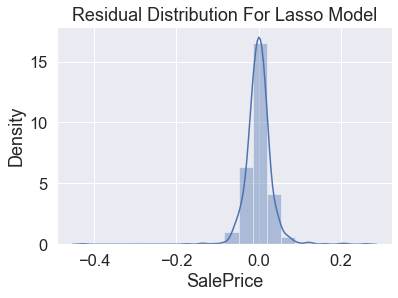

In [106]:
res = y_train - y_pred_train
sns.distplot(res,bins=20)
plt.title('Residual Distribution For Lasso Model')
plt.show()